# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("SCResp") or did not press a button ("SCRespITI" / "SCITIResp") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2, 2 is run 3, and 3 is run 4.

`CongruentCounter` marks any time a congruent trial occurred; `IncongruentCounter` an incongruent trial.

`StimPresented` refers to which scene was presented before the trial. This is in reference to the main manipulation of the S-C association phase, whereby particular scenes are more likely to precede specific proportions of congruent/incongruent trials.

`StimProbAll` refers to my matrix of possible trial types. So it indicates whether "RED" will be shown in red, etc.

`TrialType` also marks incongruent/congruent trials.

`CongruentNumber` refers to my specially made matrices of my congruent trials. So there are 4 possible congruent combinations, with 160 total congruent trials, and thus 40 occurrences of numbers 1-4.

`IncongruentNumber` refers to my specially made matrix of incongruent trials. There are 12 possible incongruent combinations, with 160 trial incongruent trials, and thus around 13 of each occurrence (#s 5-16).

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when scene was presented.

`StimTime` refers to when the color word was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

Some other labels aren't coded in the JS: `Sequential` refers to whether a trial was the same (0) as before, changed to incongruent or congruent on the next trial, etc., and `StimRep` looks for direct repetitions in the StimProbAll matrix. These were coded in Matlab and added to the CSV file.

---

### Here we'll just import Python specific packages and read in our data.

In [582]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [583]:
%cd 'C:\Users\cb383\Documents\controltransfer\expt1\data'
dat = pd.read_csv('AllSubsSC.csv')

C:\Users\cb383\Documents\controltransfer\expt1\data


# Do Some Basic Cleaning

#### We are filtering and preparing the data for analysis.

FOR REACTION TIMES:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 1000 ms.

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


FOR ACCURACY:

-All errors are errors

In [584]:
cdat = dat.query('(TypeOfResponse != "SCRespITI") & (TypeOfResponse != "SCITIResp") & (RT > 200) & (RT < 1000) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

#### Now I'm making columns in the data based off my variables so that analysis will be easier.

In [585]:
adat['DemandCue'] = adat['StimPresented'].isin([1, 2])
adat.loc[adat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'High'
adat.loc[~adat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'Low'

adat['Congruency'] = adat['TrialType'].isin([1])
adat.loc[adat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
adat.loc[~adat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

cdat['DemandCue'] = cdat['StimPresented'].isin([1, 2])
cdat.loc[cdat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'High'
cdat.loc[~cdat['StimPresented'].isin([1, 2]), 'DemandCue'] = 'Low'

cdat['Congruency'] = cdat['TrialType'].isin([1])
cdat.loc[cdat['TrialType'].isin([1]),'Congruency'] = 'Incongruent'
cdat.loc[~cdat['TrialType'].isin([1]),'Congruency'] = 'Congruent'

In [586]:
adat['ContextCong'] = adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([1])
adat.loc[(adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
adat.loc[(adat['DemandCue'].isin(['Low']) & adat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
adat.loc[(adat['DemandCue'].isin(['High']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
adat.loc[(adat['DemandCue'].isin(['Low']) & adat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

cdat['ContextCong'] = cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([1])
cdat.loc[(cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'HighIC'
cdat.loc[(cdat['DemandCue'].isin(['Low']) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'LowIC'
cdat.loc[(cdat['DemandCue'].isin(['High']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'HighC'
cdat.loc[(cdat['DemandCue'].isin(['Low']) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'LowC'

In [587]:
adat['VersionComp'] = adat['Version'].isin([1,2])
adat.loc[adat['Version'].isin([1, 2]), 'VersionComp'] = '1' #faces/houses paired
adat.loc[adat['Version'].isin([3, 4]), 'VersionComp'] = '3' #intermixed

cdat['VersionComp'] = cdat['Version'].isin([1,2])
cdat.loc[cdat['Version'].isin([1, 2]), 'VersionComp'] = '1'
cdat.loc[cdat['Version'].isin([3, 4]), 'VersionComp'] = '3'

# Look at Mean Cueing Effects

### We are hoping to see an interaction between control-demand cue and congruency, such that people use the cues to modulate Stroop congruency. Namely, we would predict that people would have a smaller difference between the Stroop trial types for the "high" compared to "low" control-demand cue. This would result from learning to associate a state of higher attentional focus with the high control-demand cue, which in turn means more efficient processing - or responding quicker to incongruent trials and potentially slower to congruent trials.

In [588]:
sub_RTmeans = cdat.groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

ContextCong
HighC     624.473969
HighIC    695.766204
LowC      624.661971
LowIC     698.032481
Name: RT, dtype: float64

In [589]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

ContextCong
HighC     51.392501
HighIC    44.591726
LowC      46.627126
LowIC     50.530264
Name: RT, dtype: float64

In [590]:
n = math.sqrt(76)
RTstderror = RTgrpstd / n
RTstderror

ContextCong
HighC     5.895124
HighIC    5.115022
LowC      5.348498
LowIC     5.796219
Name: RT, dtype: float64

#### Judging by these initial numbers, we are unlikely to find an interaction between cue & congruency. Is that true of Accuracy?

In [591]:
sub_ACCmeans = adat.groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

ContextCong
HighC     0.953947
HighIC    0.879317
LowC      0.953022
LowIC     0.883224
Name: Accuracy, dtype: float64

In [592]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

ContextCong
HighC     0.050640
HighIC    0.060735
LowC      0.040974
LowIC     0.077790
Name: Accuracy, dtype: float64

In [593]:
ACCstderror = ACCgrpstd / n
ACCstderror

ContextCong
HighC     0.005809
HighIC    0.006967
LowC      0.004700
LowIC     0.008923
Name: Accuracy, dtype: float64

# Creating Variables to Run Statistics

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for congruent & incongruent trials, after presentation of the low & high control-demand cue, for each subject.

In [594]:
RTanalysis = pd.DataFrame()
lists = [[] for list in range(0,7)]

for ID in range(10,86):
    sub = cdat[cdat.subject == ID]
    lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()    
    lists[1].append(LowCRT_trials)
    lists[2].append(LowICRT_trials)
    lists[3].append(HighCRT_trials)
    lists[4].append(HighICRT_trials)
    
RTanalysis['SubjectID'] = lists[0]
RTanalysis['LowC'] = lists[1]
RTanalysis['LowIC'] = lists[2]
RTanalysis['HighC'] = lists[3]
RTanalysis['HighIC'] = lists[4]

In [595]:
ACCanalysis = pd.DataFrame()
new_lists = [[] for list in range(0,7)]

for ID in range(10,86):
    sub = adat[adat.subject == ID]
    new_lists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()    
    new_lists[1].append(LowCACC_trials)
    new_lists[2].append(LowICACC_trials)
    new_lists[3].append(HighCACC_trials)
    new_lists[4].append(HighICACC_trials)
    
ACCanalysis['SubjectID'] = new_lists[0]
ACCanalysis['LowC'] = new_lists[1]
ACCanalysis['LowIC'] = new_lists[2]
ACCanalysis['HighC'] = new_lists[3]
ACCanalysis['HighIC'] = new_lists[4]

In [596]:
#now for run as well

RTrunanalysis = pd.DataFrame()
new_RTlists = [[] for list in range(0,8)]

for ID in range(10,86):
    sub = cdat[cdat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_RTlists[0].append(ID)
        new_RTlists[1].append(runID)
        LowCRT_trials = run[run.ContextCong == 'LowC'].RT.mean()
        LowICRT_trials = run[run.ContextCong == 'LowIC'].RT.mean()
        HighCRT_trials = run[run.ContextCong == 'HighC'].RT.mean()
        HighICRT_trials = run[run.ContextCong == 'HighIC'].RT.mean()    
        new_RTlists[2].append(LowCRT_trials)
        new_RTlists[3].append(LowICRT_trials)
        new_RTlists[4].append(HighCRT_trials)
        new_RTlists[5].append(HighICRT_trials)
    
RTrunanalysis['SubjectID'] = new_RTlists[0]
RTrunanalysis['Run'] = new_RTlists[1]
RTrunanalysis['LowC'] = new_RTlists[2]
RTrunanalysis['LowIC'] = new_RTlists[3]
RTrunanalysis['HighC'] = new_RTlists[4]
RTrunanalysis['HighIC'] = new_RTlists[5]

In [597]:
#repeat for accuracy

ACCrunanalysis = pd.DataFrame()
new_acclists = [[] for list in range(0,8)]

for ID in range(10,86):
    sub = adat[adat.subject == ID]
    for runID in range(0,4):
        run = sub[sub.RunCounter == runID]
        new_acclists[0].append(ID)
        new_acclists[1].append(runID)
        LowCACC_trials = run[run.ContextCong == 'LowC'].Accuracy.mean()
        LowICACC_trials = run[run.ContextCong == 'LowIC'].Accuracy.mean()
        HighCACC_trials = run[run.ContextCong == 'HighC'].Accuracy.mean()
        HighICACC_trials = run[run.ContextCong == 'HighIC'].Accuracy.mean()    
        new_acclists[2].append(LowCACC_trials)
        new_acclists[3].append(LowICACC_trials)
        new_acclists[4].append(HighCACC_trials)
        new_acclists[5].append(HighICACC_trials)
    
ACCrunanalysis['SubjectID'] = new_acclists[0]
ACCrunanalysis['Run'] = new_acclists[1]
ACCrunanalysis['LowC'] = new_acclists[2]
ACCrunanalysis['LowIC'] = new_acclists[3]
ACCrunanalysis['HighC'] = new_acclists[4]
ACCrunanalysis['HighIC'] = new_acclists[5]

In addition to creating databases for analysis by run, we'll also create some for the task version. This is because the S-S phase prioritizes learning associations of faces and houses with scenes, and we wanted to test whether the contrasting categorical boundaries (faces/houses) then impeded S-C learning.

In [598]:
PairedFacesHousesRT = pd.DataFrame()
V_RT_lists = [[] for list in range(0,7)]
versionGrp = cdat[cdat.VersionComp == '1']

for ID in range(10,86):
    sub = versionGrp[versionGrp.subject == ID]
    V_RT_lists[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()
    V_RT_lists[1].append(LowCRT_trials)
    V_RT_lists[2].append(LowICRT_trials)
    V_RT_lists[3].append(HighCRT_trials)
    V_RT_lists[4].append(HighICRT_trials)
    
PairedFacesHousesRT['SubjectID'] = V_RT_lists[0]
PairedFacesHousesRT['LowC'] = V_RT_lists[1]
PairedFacesHousesRT['LowIC'] = V_RT_lists[2]
PairedFacesHousesRT['HighC'] = V_RT_lists[3]
PairedFacesHousesRT['HighIC'] = V_RT_lists[4]

In [599]:
MixedFacesHousesRT = pd.DataFrame()
V_RT_lists_Mix = [[] for list in range(0,7)]
versionGrp = cdat[cdat.VersionComp == '3']

for ID in range(10,86):
    sub = versionGrp[versionGrp.subject == ID]
    V_RT_lists_Mix[0].append(ID)
    LowCRT_trials = sub[sub.ContextCong == 'LowC'].RT.mean()
    LowICRT_trials = sub[sub.ContextCong == 'LowIC'].RT.mean()
    HighCRT_trials = sub[sub.ContextCong == 'HighC'].RT.mean()
    HighICRT_trials = sub[sub.ContextCong == 'HighIC'].RT.mean()
    V_RT_lists_Mix[1].append(LowCRT_trials)
    V_RT_lists_Mix[2].append(LowICRT_trials)
    V_RT_lists_Mix[3].append(HighCRT_trials)
    V_RT_lists_Mix[4].append(HighICRT_trials)
    
MixedFacesHousesRT['SubjectID'] = V_RT_lists_Mix[0]
MixedFacesHousesRT['LowC'] = V_RT_lists_Mix[1]
MixedFacesHousesRT['LowIC'] = V_RT_lists_Mix[2]
MixedFacesHousesRT['HighC'] = V_RT_lists_Mix[3]
MixedFacesHousesRT['HighIC'] = V_RT_lists_Mix[4]

In [600]:
PairedFacesHousesACC = pd.DataFrame()
V_ACC_lists = [[] for list in range(0,7)]
versionGrp = adat[adat.VersionComp == '1']

for ID in range(10,86):
    sub = versionGrp[versionGrp.subject == ID]
    V_ACC_lists[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()
    V_ACC_lists[1].append(LowCACC_trials)
    V_ACC_lists[2].append(LowICACC_trials)
    V_ACC_lists[3].append(HighCACC_trials)
    V_ACC_lists[4].append(HighICACC_trials)
    
PairedFacesHousesACC['SubjectID'] = V_ACC_lists[0]
PairedFacesHousesACC['LowC'] = V_ACC_lists[1]
PairedFacesHousesACC['LowIC'] = V_ACC_lists[2]
PairedFacesHousesACC['HighC'] = V_ACC_lists[3]
PairedFacesHousesACC['HighIC'] = V_ACC_lists[4]

In [601]:
MixedFacesHousesACC = pd.DataFrame()
V_ACC_lists_Mix = [[] for list in range(0,7)]
versionGrp = adat[adat.VersionComp == '3']

for ID in range(10,86):
    sub = versionGrp[versionGrp.subject == ID]
    V_ACC_lists_Mix[0].append(ID)
    LowCACC_trials = sub[sub.ContextCong == 'LowC'].Accuracy.mean()
    LowICACC_trials = sub[sub.ContextCong == 'LowIC'].Accuracy.mean()
    HighCACC_trials = sub[sub.ContextCong == 'HighC'].Accuracy.mean()
    HighICACC_trials = sub[sub.ContextCong == 'HighIC'].Accuracy.mean()
    V_ACC_lists_Mix[1].append(LowCACC_trials)
    V_ACC_lists_Mix[2].append(LowICACC_trials)
    V_ACC_lists_Mix[3].append(HighCACC_trials)
    V_ACC_lists_Mix[4].append(HighICACC_trials)
    
MixedFacesHousesACC['SubjectID'] = V_ACC_lists_Mix[0]
MixedFacesHousesACC['LowC'] = V_ACC_lists_Mix[1]
MixedFacesHousesACC['LowIC'] = V_ACC_lists_Mix[2]
MixedFacesHousesACC['HighC'] = V_ACC_lists_Mix[3]
MixedFacesHousesACC['HighIC'] = V_ACC_lists_Mix[4]

In [602]:
PairedFacesHousesRT = PairedFacesHousesRT.dropna();
MixedFacesHousesRT = MixedFacesHousesRT.dropna();
PairedFacesHousesACC = PairedFacesHousesACC.dropna();
MixedFacesHousesACC = MixedFacesHousesACC.dropna();

# Run Actual Statistics

#### For the S-C phase, we run a repeated-measures ANOVA comparing RTs and accuracies for control-demand cue (low/high) & congruency (congruent/incongruent) & run (4).

Unfortunately, Python does not have the capability for repeated-measures ANOVA ("pyvtttbl" is not as good as other programs), so I will include R code to run the ANOVA. I will also include a "sneak peak" below via paired t-tests.

In [603]:
LowCongDiff = RTanalysis.LowIC - RTanalysis.LowC;
HighCongDiff = RTanalysis.HighIC - RTanalysis.HighC;
stats.ttest_rel(LowCongDiff, HighCongDiff)

Ttest_relResult(statistic=0.48937637694885389, pvalue=0.62600350062539067)

In [604]:
LowCongDiffACC = ACCanalysis.LowIC - ACCanalysis.LowC;
HighCongDiffACC = ACCanalysis.HighIC - ACCanalysis.HighC;
stats.ttest_rel(LowCongDiffACC, HighCongDiffACC)

Ttest_relResult(statistic=0.52657106480849258, pvalue=0.60004538735425306)

Here, I'm testing whether "task version" impacted S-C learning. Namely, I'm comparing the differential congruency effects following each control-demand cue across two task version groups: one where faces/houses were associated together with high/low control-demand and another where the faces and houses were intermixed in the high/low control-demand cue categorization.

In [605]:
RTpairedHighCong = PairedFacesHousesRT.HighIC - PairedFacesHousesRT.HighC
RTpairedLowCong = PairedFacesHousesRT.LowIC - PairedFacesHousesRT.LowC
RTnotpairedHighCong = MixedFacesHousesRT.HighIC - MixedFacesHousesRT.HighC;
RTnotpairedLowCong = MixedFacesHousesRT.LowIC - MixedFacesHousesRT.LowC;

RTpaired = RTpairedLowCong - RTpairedHighCong;
RTnotpaired = RTnotpairedLowCong - RTnotpairedHighCong;
stats.ttest_ind(RTpaired,RTnotpaired,equal_var=False)

Ttest_indResult(statistic=0.337175165323716, pvalue=0.73693983788616879)

In [606]:
ACCpairedHighCong = PairedFacesHousesACC.HighIC - PairedFacesHousesACC.HighC
ACCpairedLowCong = PairedFacesHousesACC.LowIC - PairedFacesHousesACC.LowC
ACCnotpairedHighCong = MixedFacesHousesACC.HighIC - MixedFacesHousesACC.HighC;
ACCnotpairedLowCong = MixedFacesHousesACC.LowIC - MixedFacesHousesACC.LowC;

ACCpaired = ACCpairedLowCong - ACCpairedHighCong;
ACCnotpaired = ACCnotpairedLowCong - ACCnotpairedHighCong;
stats.ttest_ind(ACCpaired,ACCnotpaired,equal_var=False)

Ttest_indResult(statistic=-0.01664793733124792, pvalue=0.98676331065818512)

Thus, there was no effect of task version on the S-C cueing effects (high vs. low control-demand congruency effect) for RT or accuracy.

Here: I'm storing the congruency differences from the control-demand cues to compare them with S-CT effects.

In [607]:
SCRTcueing = LowCongDiff - HighCongDiff;
SCACCcueing = LowCongDiffACC - HighCongDiffACC;

In [608]:
overallSCRT = cdat.groupby(['subject'])['RT'].mean().reset_index()
overallSCRT = overallSCRT.drop('subject',1);

%store overallSCRT
%store SCRTcueing
%store SCACCcueing

Stored 'overallSCRT' (DataFrame)
Stored 'SCRTcueing' (Series)
Stored 'SCACCcueing' (Series)


## Running ANOVAs in R

First, I need to make the data CSVs that the R script will analyze. Then I will write the necessary R script and run it in another cell here. You'll be able to see the inputs below & I summarize the results there as well. The cont files refer to contingency learning, another section in the manuscript

In [609]:
%cd 'csvdata'

C:\Users\cb383\Documents\controltransfer\expt1\data\csvdata


In [610]:
AN_sub_RTmeans = cdat.groupby(['subject','RunCounter','DemandCue','TrialType'])['RT'].mean();
#sub 19 has a missing cell for the contingency learning analysis, so we have to exclude - that's how SPSS handles it, and those are the results I reported
AN_sub_RTmeans_cont = cdat.loc[~cdat['subject'].isin([19])].groupby(['subject','DemandCue','TrialType','ResponseMatrix'])['RT'].mean();
AN_sub_ACCmeans = adat.groupby(['subject','RunCounter','DemandCue','TrialType'])['Accuracy'].mean();
AN_sub_ACCmeans_cont = adat.groupby(['subject','DemandCue','TrialType','ResponseMatrix'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans.to_csv('SC_ANOVA_RT.csv')
AN_sub_ACCmeans.to_csv('SC_ANOVA_ACC.csv')
AN_sub_RTmeans_cont.to_csv('SC_ANOVA_RT_cont.csv')
AN_sub_ACCmeans_cont.to_csv('SC_ANOVA_ACC_cont.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv
with open('SC_ANOVA_RT.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_RT.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "demandcue", "trialtype", "rt"])
    w.writerows(data)

with open('SC_ANOVA_ACC.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_ACC.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "demandcue", "trialtype", "acc"])
    w.writerows(data)

with open('SC_ANOVA_RT_cont.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_RT_cont.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "demandcue", "trialtype", "response", "rt"])
    w.writerows(data)

with open('SC_ANOVA_ACC_cont.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SC_ANOVA_ACC_cont.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "demandcue", "trialtype", "response", "acc"])
    w.writerows(data)

In [611]:
%%writefile SCAnova.R

rawRTData <- read.csv('SC_ANOVA_RT.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$run = as.factor(rawRTData$run)
rawRTData$demandcue = as.factor(rawRTData$demandcue)
rawRTData$trialtype = as.factor(rawRTData$trialtype)

SC_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, demandcue, trialtype),
                                  detailed=TRUE)
print(SC_RT_runANOVA)

rawACCData <- read.csv('SC_ANOVA_ACC.csv')

rawACCData$subject = as.factor(rawACCData$subject)
rawACCData$run = as.factor(rawACCData$run)
rawACCData$demandcue = as.factor(rawACCData$demandcue)
rawACCData$trialtype = as.factor(rawACCData$trialtype)

SC_ACC_runANOVA <- ezANOVA(data=as.data.frame(rawACCData),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, demandcue, trialtype),
                                  detailed=TRUE)
print(SC_ACC_runANOVA)

rawRTData_cont <- read.csv('SC_ANOVA_RT_cont.csv')

rawRTData_cont$subject = as.factor(rawRTData_cont$subject)
rawRTData_cont$demandcue = as.factor(rawRTData_cont$demandcue)
rawRTData_cont$trialtype = as.factor(rawRTData_cont$trialtype)
rawRTData_cont$response = as.factor(rawRTData_cont$response)

summary(aov(rt ~ demandcue * trialtype * response + Error(subject/(demandcue * trialtype * response)), data = rawRTData_cont))

#ezANOVA doesn't work with missing cells
#SC_RT_runANOVA_cont <- ezANOVA(data=as.data.frame(rawRTData_cont),
#                                  dv=rt,
#                                  wid=subject,
#                                  within=.(demandcue, trialtype, response),
#                                  detailed=TRUE)
#print(SC_RT_runANOVA_cont)

rawACCData_cont <- read.csv('SC_ANOVA_ACC_cont.csv')

rawACCData_cont$subject = as.factor(rawACCData_cont$subject)
rawACCData_cont$demandcue = as.factor(rawACCData_cont$demandcue)
rawACCData_cont$trialtype = as.factor(rawACCData_cont$trialtype)
rawACCData_cont$response = as.factor(rawACCData_cont$response)

SC_ACC_runANOVA_cont <- ezANOVA(data=as.data.frame(rawACCData_cont),
                                  dv=acc,
                                  wid=subject,
                                  within=.(demandcue, trialtype, response),
                                  detailed=TRUE)
print(SC_ACC_runANOVA_cont)


Overwriting SCAnova.R


In [612]:
! Rscript SCAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpIdngxx\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpIdngxx\downloaded_packages
$ANOVA
                   Effect DFn DFd          SSn        SSd            F
1             (Intercept)   1  75 5.310867e+08 2336416.56 1.704812e+04
2                     run   3 225 2.723108e+03  505567.62 4.039680e-01
3               demandcue   1  75 5.465272e+02   66453.17 6.168184e-01
4               trialtype   1  75 1.592457e+06  296496.06 4.028191e+02
5           run:demandcue   3 225 2.097988e+03  203920.79 7.716187e-01
6           run:trialtype   3 225 1.013063e+04  224943.49 3.377724e+00
7     demandcue:trialtype   1  75 5.613808e+02  104435.80 4.031525e-01
8 run:demandcue:trialtype   3 225 2.722722e+03  248988.65 8.201343e-01
             p p<.05         

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/psych_1.7.5.zip'
Content type 'application/zip' length 3966952 bytes (3.8 MB)
downloaded 3.8 MB

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/ez_4.4-0.zip'
Content type 'application/zip' length 304788 bytes (297 KB)
downloaded 297 KB

Warning message:
package 'psych' was built under R version 3.3.3 
Warning message:
package 'ez' was built under R version 3.3.3 


#### As anticipated, participants responded more slowly and less accurately on incongruent trials (main effect of congruency). There was, however, neither a main effect of S2 control-demand cue nor an interaction between cue and congruency or run, cue, and congruency on RT or accuracy. 

#### At the group level, we thus did not observe any evidence that participants used the S2 control-demand cues to modulate Stroop congruency. However, there was a large amount of individual variability in S-C cueing effects (see S-CT phase analysis).

#### A common alternative interpretation of stimulus- or context-control learning suggests that these effects might instead reflect learning of straight stimulus-response contingencies (Schmidt & Besner, 2008). For instance, if a particular color-word is frequently paired with a specific incongruent ink color (and its response), participants may learn this specific stimulus-response association rather than an association between the word and a high demand for control. We formally tested the possibility of contingency learning by running a repeated-measures ANOVA on S-C phase data with control-demand cue, congruency, and response button as within-subjects factors. While there was a main effect of response button such that participants were fastest and most accurate to respond with their right middle finger and slowest and least accurate with their left index finger, we observed little evidence that participants modulated performance through any knowledge of cue-stimulus-response associations or of cue-response associations. These analyses suggest that our results were not driven by contingency learning effects.

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

In [613]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


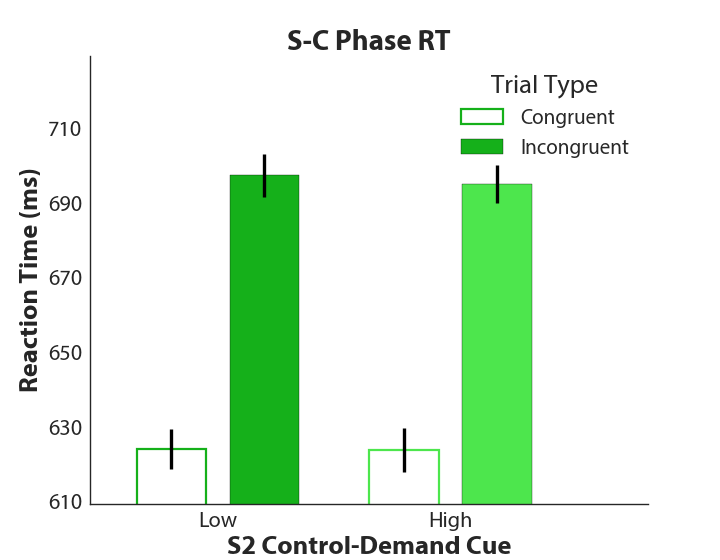

In [614]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,RTanalysis.LowC.mean(),barwidth,yerr=RTstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,RTanalysis.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,RTanalysis.HighC.mean(),barwidth,yerr=RTstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,RTanalysis.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(610,730);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1 + barwidth/2, 3.5 + barwidth/2]);
ax.set_yticks(np.arange(610, 711, 20));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=19)
plt.title('S-C Phase RT', fontsize=26,fontweight="bold")
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


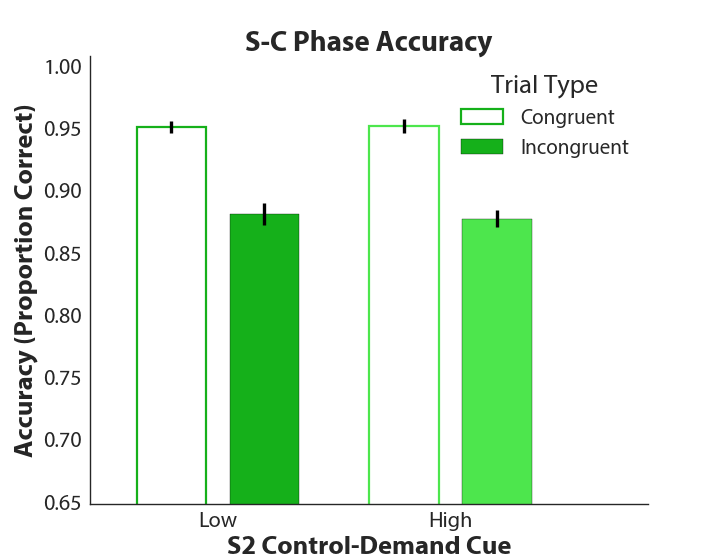

In [615]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,ACCanalysis.LowC.mean(),barwidth,yerr=ACCstderror.LowC,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,ACCanalysis.LowIC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror.LowIC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(3,ACCanalysis.HighC.mean(),barwidth,yerr=ACCstderror.HighC,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(4,ACCanalysis.HighIC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror.HighIC,ecolor='k',error_kw=dict(lw=3));
ax.set_ylim(0.65,1.01);
ax.set_xlim(0,6);
ax.set_xticklabels(('Low', 'High'));
ax.set_xticks([1 + barwidth/2, 3.5 + barwidth/2]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=19)
plt.title('S-C Phase Accuracy', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S2 Control-Demand Cue', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

# Making 95% Confidence Intervals

Now I'm making the Supplementary tables that show our data in full, with 95% CIs accompanying the means.

In [616]:
import statsmodels.stats.api as sms

a = RTanalysis.LowC.mean()
sms.DescrStatsW(RTanalysis.LowC).tconfint_mean()
#a

(614.00721609598349, 635.31672567447072)

In [617]:
a = RTanalysis.LowIC.mean()
sms.DescrStatsW(RTanalysis.LowIC).tconfint_mean()
#a

(686.48582101079501, 709.57914098149672)

In [618]:
a = RTanalysis.HighC.mean()
sms.DescrStatsW(RTanalysis.HighC).tconfint_mean()
#a

(612.73027999117141, 636.21765888386528)

In [619]:
a = RTanalysis.HighIC.mean()
sms.DescrStatsW(RTanalysis.HighIC).tconfint_mean()
#a

(685.57655810331948, 705.95584984602533)

In [620]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowC).tconfint_mean()
#a

(608.43050635159602, 631.81852377067548)

In [621]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].LowIC).tconfint_mean()
#a

(689.84130608310249, 720.49190193694756)

In [622]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighC).tconfint_mean()
#a

(607.59201142607367, 633.37380937593139)

In [623]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].HighIC).tconfint_mean()
#a

(685.95099302557321, 709.04642230180832)

In [624]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowC).tconfint_mean()
#a

(612.33107452796696, 634.57363280957236)

In [625]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].LowIC).tconfint_mean()
#a

(681.43497278095788, 710.43247709372895)

In [626]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighC).tconfint_mean()
#a

(606.92139282630819, 634.30041168496996)

In [627]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].HighIC).tconfint_mean()
#a

(682.06168940069699, 706.37909108542442)

In [628]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowC).tconfint_mean()
#a

(613.48454665328018, 636.70767168757857)

In [629]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].LowIC).tconfint_mean()
#a

(679.6040268907368, 709.65866107918805)

In [630]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighC).tconfint_mean()
#a

(616.58499239188063, 648.880421141954)

In [631]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 2].HighIC).tconfint_mean()
#a

(681.84323589341659, 704.62975533191877)

In [632]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowC).tconfint_mean()
#a

(618.04296387886336, 641.99163900691599)

In [633]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].LowIC).tconfint_mean()
#a

(683.52592242463356, 712.27388960544158)

In [634]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighC).tconfint_mean()
#a

(610.62806353874578, 639.24424222566529)

In [635]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighIC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 3].HighIC).tconfint_mean()
#a

(686.48402034056789, 709.27011192156647)

And for Accuracy...

In [636]:
a = ACCanalysis.LowC.mean()
sms.DescrStatsW(ACCanalysis.LowC).tconfint_mean()
#a

(0.94365925971771814, 0.96238514817701881)

In [637]:
a = ACCanalysis.LowIC.mean()
sms.DescrStatsW(ACCanalysis.LowIC).tconfint_mean()
#a

(0.86544794172228579, 0.90099942669876687)

In [638]:
a = ACCanalysis.HighC.mean()
sms.DescrStatsW(ACCanalysis.HighC).tconfint_mean()
#a

(0.94237561182612373, 0.96551912501598158)

In [639]:
a = ACCanalysis.HighIC.mean()
sms.DescrStatsW(ACCanalysis.HighIC).tconfint_mean()
#a

(0.86543879193703965, 0.893196076484013)

In [640]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowC).tconfint_mean()
#a

(0.94692054306466067, 0.97084261483007628)

In [641]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].LowIC).tconfint_mean()
#a

(0.80835058838597063, 0.87585993792981875)

In [642]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighC).tconfint_mean()
#a

(0.93480492479946387, 0.97308981204264144)

In [643]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].HighIC).tconfint_mean()
#a

(0.84426046044765946, 0.88271322376286687)

In [644]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowC).tconfint_mean()
#a

(0.9413190448409664, 0.9649309551590336)

In [645]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].LowIC).tconfint_mean()
#a

(0.85958546803571134, 0.92001979512218335)

In [646]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighC).tconfint_mean()
#a

(0.93770598453818832, 0.97347822598812739)

In [647]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].HighIC).tconfint_mean()
#a

(0.86194236597886131, 0.89792605507377032)

In [648]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowC).tconfint_mean()
#a

(0.93749023852983582, 0.96218081410174316)

In [649]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].LowIC).tconfint_mean()
#a

(0.86724592943377055, 0.91893828109254516)

In [650]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighC).tconfint_mean()
#a

(0.94470603136166409, 0.97963607390149388)

In [651]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 2].HighIC).tconfint_mean()
#a

(0.85506288320033741, 0.89575948522071525)

In [652]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowC).tconfint_mean()
#a

(0.93751647109766978, 0.96297694995496186)

In [653]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].LowIC).tconfint_mean()
#a

(0.88633291743189579, 0.92945655625231482)

In [654]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighC).tconfint_mean()
#a

(0.91836324552245518, 0.96979464921438685)

In [655]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighIC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 3].HighIC).tconfint_mean()
#a

(0.88177702821080783, 0.91509797178919217)